In [188]:
%reset -f
%connect_info

100%|███████████████████████████████████████████████████████████████████████| 500/500 [01:12<00:00,  6.85it/s]

{
  "shell_port": 36083,
  "iopub_port": 60927,
  "stdin_port": 40357,
  "control_port": 35243,
  "hb_port": 43457,
  "ip": "127.0.0.1",
  "key": "2caae89e-f474266c4c4bb6da23630d98",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-3256413f-4fbf-4be8-86f7-947e898fd2ab.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [189]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import serial
import time
from tqdm import tqdm # progressbar in for loop
from collections import Counter # to sum dict values up
from datetime import datetime
import os

In [190]:
classes_values = ['beer',
                  'coffee',
                  'orange'
                  ]

In [191]:
#########################
## set the paths and load data
#########################
path_base = "/home/trix_arch/IIVspace/DataSc/"+\
            "DataCamp2021/DSR_B28_work/DSR28_portfolio_project/"+\
            "Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
path_add_folder2readmodel = "tf_models/"
model_filename = 'model_c5_n36d02n24d02_mk1'

In [192]:
#########################
## Load into a new model
#########################
model_ff = tf.keras.models.load_model((path_base + path_add_folder2readmodel + model_filename))

# Check its architecture
model_ff.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 36)                252       
_________________________________________________________________
dropout_6 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                888       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24)                0         
_________________________________________________________________
y_pred (Dense)               (None, 3)                 75        
Total params: 1,215
Trainable params: 1,215
Non-trainable params: 0
_________________________________________________________________


In [193]:
#########################
## Lets predict
#########################
#### The values are taken from "classification_tf_train_model1_01.ipynb"

# Values_Train: [[64. 15. 64. 93. 15. 66.]]
# Label_Train:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
# Label_Text:   [['cheese']]
data2predictArr = np.array([[64, 15, 64, 93, 15, 66]])

# Values_Train: [[ 82.  27.  70. 106.  22.  56.]]
# Label_Train:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
# Label_Text:   [['carrot']]
# data2predictArr = np.array([[ 82,  27,  70, 106,  22,  56]])
    
# Values_Test: [[ 60.  32. 154. 288.  25.  45.]]
# Label_Test:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
# Label_Text:   [['beer']]    
# data2predictArr = np.array([[ 60,  32, 154, 288,  25,  45]])    

# Values_Test: [[62. 33. 90. 91. 22. 60.]]
# Label_Test:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
# Label_Text:   [['sprite']]
# data2predictArr = np.array([[62, 33, 90, 91, 22, 60]])

predictionN = model_ff.predict(data2predictArr)
predictionN

array([[1.0000000e+00, 3.6632976e-28, 1.0758644e-14]], dtype=float32)

In [194]:
data2predictArr.size

6

In [195]:
# fig = plt.figure(figsize=(6, 5))
# plt.barh(classes_values, predictionN.tolist()[0])
# for index, value in zip(classes_values, predictionN.tolist()[0]):
#     plt.text(0.7, index, str(round(value, 5)))
#     # plt.text(value, index, str(value))
# plt.tick_params(axis='x', colors='red')
# plt.tick_params(axis='y', colors='red')
# plt.grid()
# plt.show()

In [196]:
#########################
## Live predict
#########################
N_of_readings = 500 #10Hz=100ms : 10 -> 1sec

serial_port = '/dev/ttyACM0'
baud_rate = 9600


pbar = tqdm(total=N_of_readings)
GGS_list = []
init_time = round(time.time(),3)*1000


    
with serial.Serial(serial_port, baud_rate) as ser:
    for cc1 in tqdm(range(10)):
        line_z = ser.readline();
        line_dec_z = line_z.decode("utf-8")
        
    while len(GGS_list) < N_of_readings:
        line = ser.readline();
        line_dec = line.decode("utf-8") #ser.readline returns a binary, convert to string
        lst0 = line_dec.split(",")
        lst1 = [int(x) for x in lst0]
        if len(lst1)==6:
            GGS_list += [[int(round(time.time(),3)*1000-init_time)] + lst1]
            pbar.update(1)
#             print(line_dec);

GGS_df = pd.DataFrame(GGS_list, columns=["time_ms", "B102NO2", "B302C2H5OH", "B502VOC", "B702CO", "TdegC", "RH"])
GGS_df

100%|███████████████████████████████████████████████████████████████████████| 500/500 [01:06<00:00,  7.70it/s]

,time_ms,B102NO2,B302C2H5OH,B502VOC,B702CO,TdegC,RH
0,1217,741,407,522,156,24,33
1,1348,741,407,522,156,24,33
2,1479,741,407,522,156,24,33
3,1610,741,407,522,156,24,33
4,1737,741,408,522,156,24,33
...,...,...,...,...,...,...,...
495,66075,760,504,533,178,24,33
496,66206,760,504,533,178,24,33
497,66337,760,505,533,178,24,33
498,66468,760,505,533,178,24,33


In [197]:
GGS_df.shape == (50,7)

False

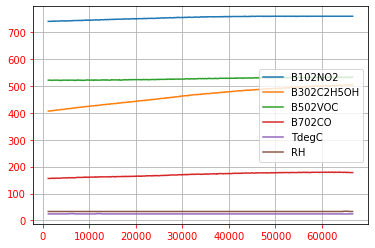

In [198]:
plt.plot(GGS_df.time_ms, GGS_df.iloc[:,1:7])
plt.legend(GGS_df.iloc[:,1:7].columns.to_list())
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid()

In [199]:
data2predictArr = GGS_df.iloc[:,1:].to_numpy()
data2predictArr.shape=(data2predictArr.shape[0],6)
predictionN = model_ff.predict(data2predictArr)
print(predictionN)
data2predictArrAver = predictionN.mean(axis=0)
print(data2predictArrAver)

[[4.7007073e-38 1.2679881e-04 9.9987316e-01]
 [4.7007073e-38 1.2679881e-04 9.9987316e-01]
 [4.7007073e-38 1.2679881e-04 9.9987316e-01]
 ...
 [0.0000000e+00 1.0000000e+00 8.7834992e-14]
 [0.0000000e+00 1.0000000e+00 8.7834999e-14]
 [0.0000000e+00 1.0000000e+00 8.7834999e-14]]
[1.9941834e-38 7.6822740e-01 2.3177257e-01]


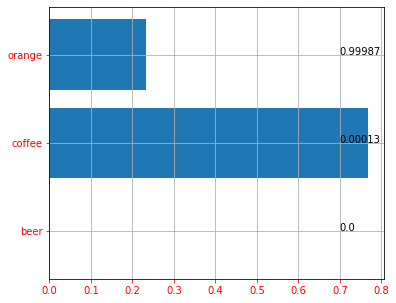

In [200]:
fig = plt.figure(figsize=(6, 5))
plt.barh(classes_values, data2predictArrAver.tolist())
for index, value in zip(classes_values, predictionN.tolist()[0]):
    plt.text(0.7, index, str(round(value, 5)))
    # plt.text(value, index, str(value))
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid()
plt.show()